In [25]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [26]:
def show_img(color_img, title, pos):

    img_RGB  = color_img[:, :, :: -1]
    ax = plt.subplot(2, 3, pos)

    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

In [27]:
def show_hist_rgb(hist, title,pos,  color):
    ax = plt.subplot(2, 3, pos)
    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("Number of Pixels")
    plt.xlim([0, 256])

    for (h, c) in zip(hist, color):
        plt.plot(h, color=c)

In [28]:
def show_hist_gray(hist, title, pos, color):
    ax = plt.subplot(2, 3, pos)
    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("Number of Pixels")
    plt.xlim([0, 256])
    plt.plot(hist, color=color)

In [29]:
def hist_color_img(img):
    """ Calculates the histogram for a three-channel image
    """
    histr = []
    histr.append(cv2.calcHist([img], [0],None, [256],[0, 256]))
    histr.append(cv2.calcHist([img], [1],None, [256],[0, 256]))
    histr.append(cv2.calcHist([img], [2],None, [256],[0, 256]))
    return histr

In [30]:
def plot_hist(hist_items, color):
    """Plots the histogram of a image"""

    offset_down = 19
    offset_up = 10

    #x-values will be used for creating the points to visualize
    x_values = np.arange(256).reshape(256, 1)

    #creating the canvas where Histogram will be plotted
    canvas = np.ones((300, 256, 3), dtype="uint8") * 255

    for hist_item, col in zip(hist_items, color):

        #Normalize in the range for proper visualization
        cv2.normalize(hist_item, hist_item, 0 + offset_down, 300 - offset_up, cv2.NORM_MINMAX)

        #Round the normalized values of the histogram
        around = np.around(hist_item)

        #cast the values to int
        hist = np.int32(around)

        #creating the points using the histogram and x-coord
        pts = np.column_stack((x_values, hist))

        #DRAWING the POINTS
        cv2.polylines(canvas, [pts],False, col, 2)

        #DRAWING a RECTANGLE
        cv2.rectangle(canvas, (0,0), (255, 298), (0,0,0),1)

    res = np.flipud(canvas)
    return res

plt.figure(figsize=(20, 12))
plt.suptitle("Custom Visualization of Histograms", fontsize=14, fontweight="bold")


Text(0.5, 0.98, 'Custom Visualization of Histograms')

<Figure size 1440x864 with 0 Axes>

In [31]:
#loading the original image
image = cv2.imread("images/lenna_mod.png")

#Converting the original image to GRAYSCALE
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram for this BGR image:
hist = cv2.calcHist([gray_image], [0],None, [256],[0, 256])
hist_color = hist_color_img(image)

gray_plot = plot_hist([hist], [(255, 0, 255)])
color_plot = plot_hist(hist_color, [(255, 0, 0), (0, 255, 0), (0, 0, 255)])




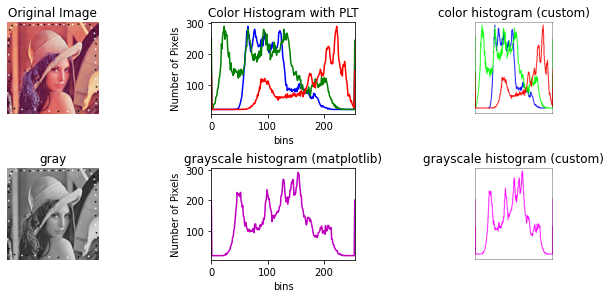

In [42]:
show_img(image, "Original Image", 1)
show_img(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 4)

show_hist_rgb(hist_color, "Color Histogram with PLT", 2, ['b', 'g', 'r'])
show_hist_gray(hist, "grayscale histogram (matplotlib)", 5, 'm')

show_img(gray_plot, "grayscale histogram (custom)", 6)
show_img(color_plot, "color histogram (custom)", 3)

plt.subplots_adjust(top=0.95,right=1.5, left=0.1, wspace=0.6, hspace=0.6)
plt.show()

